This notebook exports choropleth maps (png formats) using geoplot python library. Inputs for this noteook are a geojson file for the Kenya counties, a drought risk component dataframe and an indicator index dataframe for the individual drought components.  

In [ ]:
#install required libraries

!pip install geoplot
!pip install matplotlib_scalebar

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.0 MB 21.1 MB/s 
     |████████████████████████████████| 10.8 MB 50.8 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... error
     |████████████████████████████████| 10.8 MB 45.6 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... error
     |████████████████████████████████| 10.8 MB 48.9 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... error
     |████████████████████████████████| 10.8 MB 66.9 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... error
     |████████████████████████████████| 12.1 MB 46.6 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 19.3 MB 79.2 MB/s 
     |█

In [ ]:
import geopandas as gpd
import geoplot as gplt
import pandas as pd
import mapclassify as mc
import matplotlib.pyplot as plt
from matplotlib_scalebar.scalebar import ScaleBar
from google.colab import files

In [ ]:
#upload the Kenya counties geojson file

uploaded = files.upload()
mygeojson = next(iter(uploaded))

Saving Counties_ke.geojson to Counties_ke.geojson


In [ ]:
ke_counties = gpd.read_file(mygeojson)

In [ ]:
ke_counties.head()

,COUNTIES,geometry
0,BARINGO,"MULTIPOLYGON (((35.63122 0.71470, 35.63137 0.7..."
1,BOMET,"MULTIPOLYGON (((35.30407 -0.44477, 35.30468 -0..."
2,BUNGOMA,"MULTIPOLYGON (((34.41433 0.80905, 34.41451 0.8..."
3,BUSIA,"MULTIPOLYGON (((34.21822 0.28601, 34.21494 0.2..."
4,ELGEYO MARAKWET,"MULTIPOLYGON (((35.68448 1.09351, 35.68445 1.0..."


In [ ]:
# Upload the normalized indicators csv

uploaded = files.upload()
mycd = next(iter(uploaded))

Saving normalized_indicators.csv to normalized_indicators (1).csv


In [ ]:
indicators = pd.read_csv(mycd)
indicators.head(3)

,County,Literacy rate %,Poverty severity rate %,Access drinking water,Improved sanitation,Gini Coefficient %,FIP Frequency,Travel times,water sources,Unemployment %,SPI Frequency
0,BARINGO,0.221393,0.168367,0.91771,0.641707,0.218563,0.25,0.308314,0.91771,0.294290,0.333333
1,BOMET,0.129353,0.040816,0.83542,0.331001,0.170659,0.00,0.468318,0.83542,0.008297,0.666667
2,BUNGOMA,0.246269,0.158163,0.09839,0.232330,0.440120,0.00,0.200357,0.09839,0.044412,1.000000


In [ ]:
# Join the Kenya counties layer with the indicators dataframe.

result = ke_counties.set_index('COUNTIES').join(indicators.set_index('County '))
result.head(2)

,geometry,Literacy rate %,Poverty severity rate %,Access drinking water,Improved sanitation,Gini Coefficient %,FIP Frequency,Travel times,water sources,Unemployment %,SPI Frequency
COUNTIES,,,,,,,,,,,
BARINGO,"MULTIPOLYGON (((35.63122 0.71470, 35.63137 0.7...",0.221393,0.168367,0.91771,0.641707,0.218563,0.25,0.308314,0.91771,0.294290,0.333333
BOMET,"MULTIPOLYGON (((35.30407 -0.44477, 35.30468 -0...",0.129353,0.040816,0.83542,0.331001,0.170659,0.00,0.468318,0.83542,0.008297,0.666667


/usr/local/lib/python3.7/dist-packages/geoplot/geoplot.py:982: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for subgeom in geom:


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

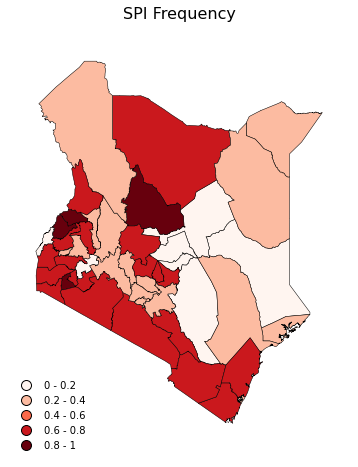

In [ ]:
# Plot the harzard indicator (SPI) map and export it.

def plot_map (c,t):
  
  scheme = mc.EqualInterval(result[c], k=5)

  ax = gplt.choropleth(result, hue=c,
    edgecolor='black', linewidth=0.5,
    figsize=(8,8),
    cmap='Reds',
    legend=True, legend_kwargs={'loc': 'lower left','frameon': False},
    scheme=scheme)
  
  
    
  
  plt.title(t, fontsize=16)



plot_map('SPI Frequency', "SPI Frequency" )
plt.savefig("SPI.png", dpi=150)
files.download("SPI.png") 





In [ ]:
vulnerability_indicators = ['Literacy rate %','Poverty severity rate %','Access drinking water','Gini Coefficient %','Improved sanitation','FIP Frequency']

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

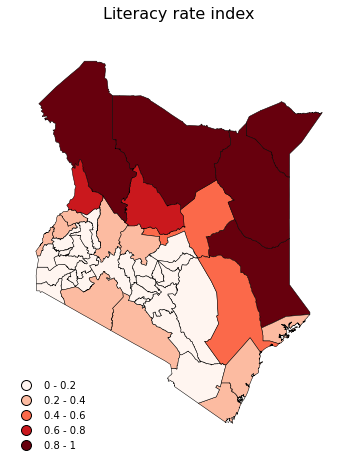

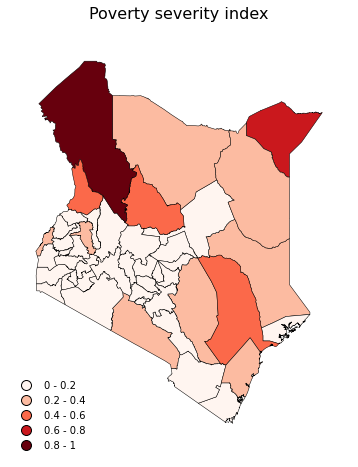

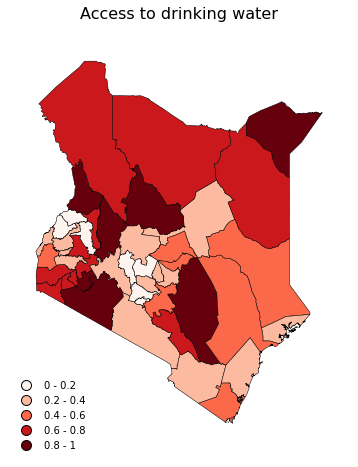

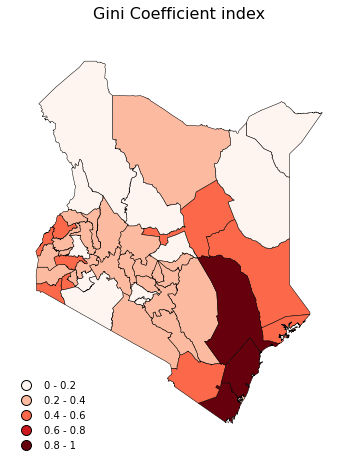

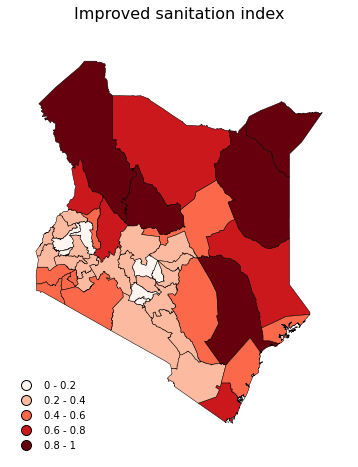

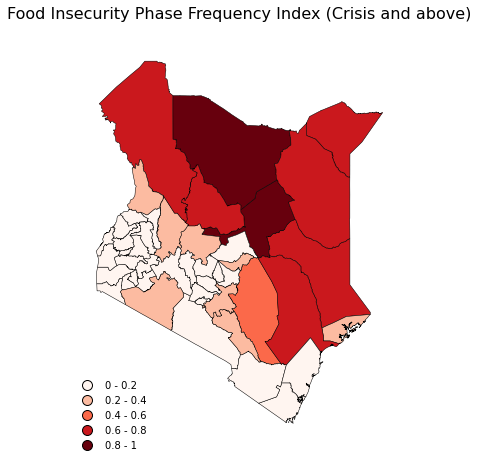

In [ ]:

# Plot the 6 vulnerability indicators map and export them



plot_map(vulnerability_indicators[0], "Literacy rate index" )
plt.savefig("literacy.png", dpi=150)
files.download("literacy.png") 

plot_map(vulnerability_indicators[1], "Poverty severity index" )
plt.savefig("poverty.png", dpi=150)
files.download("poverty.png") 

plot_map(vulnerability_indicators[2], "Access to drinking water" )
plt.savefig("drinking_water_vulnerability.png", dpi=150)
files.download("drinking_water_vulnerability.png") 

plot_map(vulnerability_indicators[3], "Gini Coefficient index" )
plt.savefig("gini.png", dpi=150)
files.download("gini.png") 

plot_map(vulnerability_indicators[4], "Improved sanitation index" )
plt.savefig("sanitation.png", dpi=150)
files.download("sanitation.png") 

plot_map(vulnerability_indicators[5], "Food Insecurity Phase Frequency Index (Crisis and above)" )
plt.savefig("FIP.png", dpi=150)
files.download("FIP.png") 






In [ ]:
lack_coping_cap_indicators = ['Travel times', 'water sources', 'Unemployment %']

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

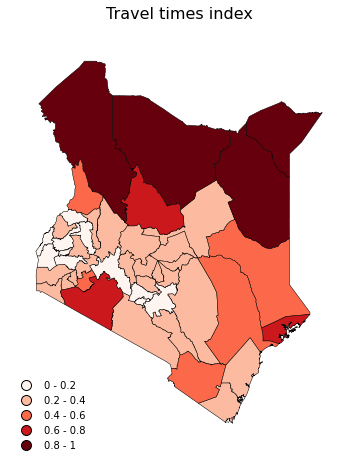

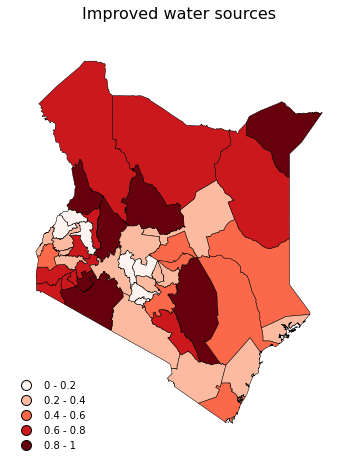

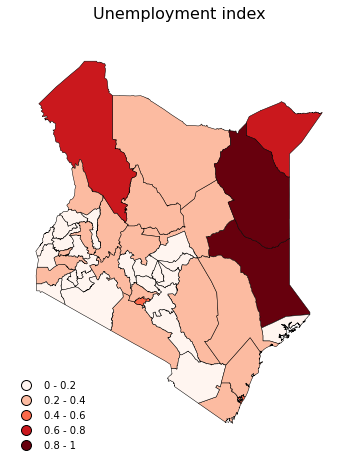

In [ ]:
# Plot the 3 lack of coping capacity indicators map and export them

plot_map(lack_coping_cap_indicators[0], "Travel times index" )
plt.savefig("travel_times.png", dpi=150)
files.download("travel_times.png") 

plot_map(lack_coping_cap_indicators[1], "Improved water sources" )
plt.savefig("water_sources.png", dpi=150)
files.download("water_sources.png") 

plot_map(lack_coping_cap_indicators[2], "Unemployment index" )
plt.savefig("unemployment.png", dpi=150)
files.download("unemployment.png") 

In [ ]:
# Upload the drought components csv file

uploaded = files.upload()
mycs2 = next(iter(uploaded))

Saving components.csv to components.csv


In [ ]:
components = pd.read_csv(mycs2)
components.head(3)

,County,drought_risk_normalized,drought_risk,hazard_component,vulnerability_component,coping_component
0,BARINGO,0.130366,0.085496,0.333333,0.477411,0.537248
1,BOMET,0.106228,0.069666,0.666667,0.252008,0.414666
2,BUNGOMA,0.000000,0.000000,1.000000,0.191373,0.000000


In [ ]:
# Append or join the Kenya counties with the components dataframe

result_2 = ke_counties.set_index('COUNTIES').join(components.set_index('County '))
result_2.head(2)

,geometry,drought_risk_normalized,drought_risk,hazard_component,vulnerability_component,coping_component
COUNTIES,,,,,,
BARINGO,"MULTIPOLYGON (((35.63122 0.71470, 35.63137 0.7...",0.130366,0.085496,0.333333,0.477411,0.537248
BOMET,"MULTIPOLYGON (((35.30407 -0.44477, 35.30468 -0...",0.106228,0.069666,0.666667,0.252008,0.414666


In [ ]:
drought_components= ['drought_risk','hazard_component','vulnerability_component','coping_component','drought_risk_normalized']

/usr/local/lib/python3.7/dist-packages/geoplot/geoplot.py:982: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for subgeom in geom:


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

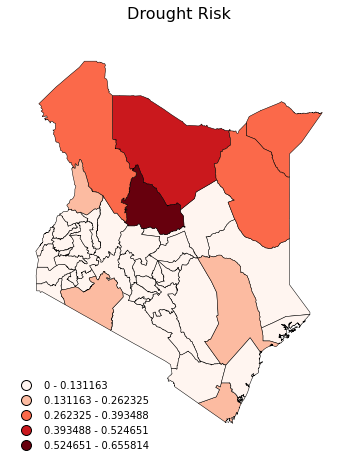

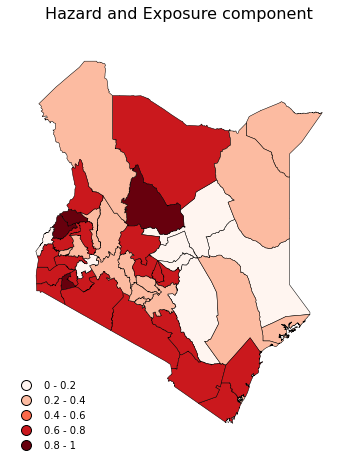

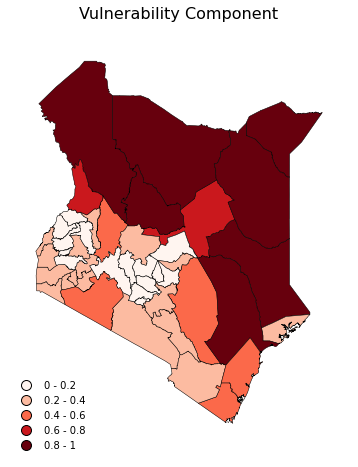

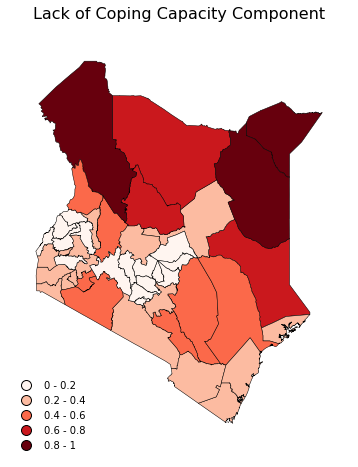

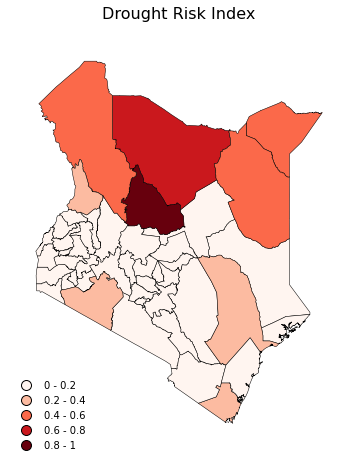

In [ ]:
# Plot the individual maps for lack of coping capacity and export them

def plot_map (c,t):
  
  scheme = mc.EqualInterval(result_2[c], k=5)

  gplt.choropleth(result_2, hue=c,
    edgecolor='black', linewidth=0.5,
    figsize=(8,8),
    cmap='Reds',
    legend=True, legend_kwargs={'loc': 'lower left','frameon': False},
    scheme=scheme)
  
    
  
  plt.title(t, fontsize=16)

plot_map(drought_components[0], "Drought Risk" )
plt.savefig("Drought Risk.png")
files.download("Drought Risk.png") 

plot_map(drought_components[1], "Hazard and Exposure component" )
plt.savefig("Hazard and Exposure component.png")
files.download("Hazard and Exposure component.png") 

plot_map(drought_components[2], "Vulnerability Component")
plt.savefig("Vulnerability Component.png")
files.download("Vulnerability Component.png") 

plot_map(drought_components[3], "Lack of Coping Capacity Component" )
plt.savefig("Lack of Coping Capacity Component.png")
files.download("Lack of Coping Capacity Component.png")

plot_map(drought_components[4], "Drought Risk Index" )
plt.savefig("Drought Risk Index.png")
files.download("Drought Risk Index.png")